In [1]:
#Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Import dataset into Google Colab
from google.colab import drive
drive.mount("/content/gdrive")
df = pd.read_csv("/content/gdrive/My Drive/Data Analytics/Labor/labor2023.csv")
df.head()

Mounted at /content/gdrive


,prov,cma,immig,age_12,age_6,sex,marstat,educ,schooln,naics_21,...,lkemploy,lkrels,lkatads,lkansads,lkother,prioract,ynolook,tlolook,efamtype,agyownk
0,24,2,3,7,,2,6,0,1,1,...,,,,,,,,,1,
1,47,0,3,4,,2,6,5,1,21,...,,,,,,,,,1,
2,10,0,3,10,,1,1,1,1,20,...,,,,,,,,,5,
3,35,0,3,12,,2,1,4,,,...,,,,,,,,,11,
4,35,0,3,5,,1,1,2,1,6,...,,,,,,,,,18,


In [48]:
#Cleaning data. Turn blank data into Nan

df=df.replace(" ",np.NaN)
df=df.replace("  ",np.NaN)
df=df.replace("   ",np.NaN)
df=df.replace("    ",np.NaN)
df=df.replace("     ",np.NaN)
df=df.replace("      ",np.NaN)

In [3]:
#Group data of provinces
prov_group = {10: 1,
              11: 1,
              12: 1,
              13: 1,
              24: 24,
              35: 35,
              46: 46,
              47: 47,
              48: 48,
              59: 59}
df["prov_group"] = df["prov"].replace(prov_group)

(-1.25, 1.25, -1.25, 1.25)

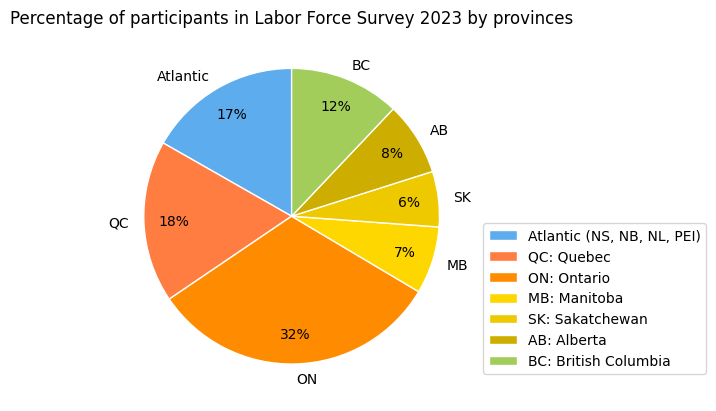

In [4]:
# Sample of provinces
  # Define list of label
labels = {1: "Atlantic",
          24: "QC",
          35: "ON",
          46: "MB",
          47: "SK",
          48: "AB",
          59: "BC"}
full_labels = {1: "Atlantic (NS, NB, NL, PEI)",
               24: "QC: Quebec",
               35: "ON: Ontario",
               46: "MB: Manitoba",
               47: "SK: Sakatchewan",
               48: "AB: Alberta",
               59: "BC: British Columbia"}
  # Define list of color with province code
colors = {1: "#5CACEE",
          24: "#FF7D40",
          35: "#FF8C00",
          46: "#FFD700",
          47: "#EEC900",
          48: "#CDAD00",
          59: "#A2CD5A"}
prov_percent = df.groupby(["prov_group"]).count().plot(kind="pie", y="cma", labels=labels.values(), startangle=90, colors=[colors[key] for key in labels], autopct='%1.0f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, pctdistance=0.8)
prov_percent.get_legend().set_visible(False)
plt.title ("Percentage of participants in Labor Force Survey 2023 by provinces")
plt.legend (labels=full_labels.values(), loc="best", bbox_to_anchor=(1, 0., 0.1, 0.5))
plt.axis('off')

The abobe graph shows the percentage of survey participants by province. These proportion is consistent with the population and size of each province. Ontario and Quebec is the two crowded provinces, whose total accounts for half of number of people doing the labor force survey. Atlantic region, including four provinces, makes up 17% of the survey pool due to it small population in these remote provinces.

Text(0.5, 0, 'Hourly wage')

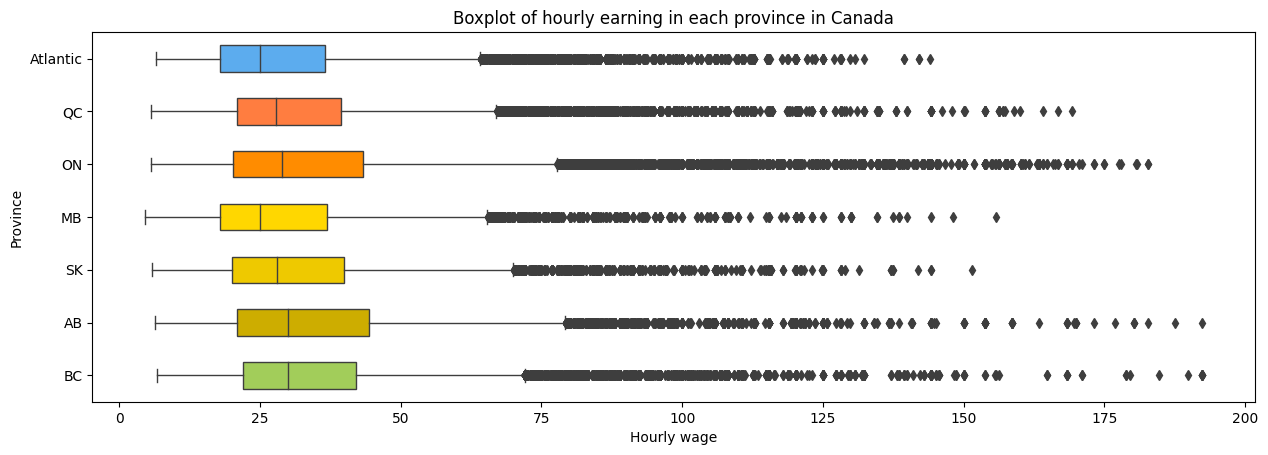

In [5]:
# Distribution of Hourly earning in each province
df["prov_name"] = df["prov_group"].replace(labels)
df_working = df[["hrlyearn","prov_name"]].dropna()
df_working["hrlyearn"] = df_working["hrlyearn"].astype(float)

colors_set = {"Atlantic": "#5CACEE",
          "QC": "#FF7D40",
          "0N": "#FF8C00",
          "MB": "#FFD700",
          "SK": "#EEC900",
          "AB": "#CDAD00",
          "BC": "#A2CD5A"}

plt.figure().set_figwidth(15)
hrlyearn_by_prov = sns.boxplot (x="hrlyearn", y="prov_name", data=df_working, order=["Atlantic", "QC", "ON", "MB", "SK", "AB", "BC"], palette=[colors[key] for key in labels], width=0.5, linewidth=1, fliersize=5, saturation=1.5)
plt.title("Boxplot of hourly earning in each province in Canada")
plt.ylabel("Province")
plt.xlabel("Hourly wage")

Noticebly, laborers in Ontario and Alberta have the highest hourly earning averagely. Also, the interquartiles of these two provinces are largest ones among all provinces in Canada, which means the the hourly wage rate there are more various compared to the one of other provinces. Though the outlier hourly earning in Alberta is higher than the one of Ontario, there are more people in Ontario hitting the top rates over $150 per hour.

Quebec and British Columbia are sharing the similar pattern in the wage rate distribution. Whereas the median wage of these two provinces are closed to the ones of Alberta and Ontario, their interquartile is smaller than the ones of such two provinces. It means the hourly earning of laborers in Quebec and British Columbia are less variable in comparison with the ones of Ontariao and Alberta. Interestingly, there are some outlier people in British Columbia who are able to earn more than $175 per hour like top people in Alberta.

Working people in Atlantic and Manitoba have the lowest hourly earning among provinces in Canada. Although Manitoba's minimum and lower quarter of wage rate is lower than Atlantic's, their median hourly eanings are the same, even the uppper quarter of Manitoba's wage rate distribution is a little bit higher.

<ipython-input-6-b2017afed6f3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hrlyearn_ON = df_working[df["prov_name"]=="ON"]
<ipython-input-6-b2017afed6f3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hrlyearn_AB = df_working[df["prov_name"]=="AB"]


Text(0.5, 9.444444444444438, 'Hourly wage')

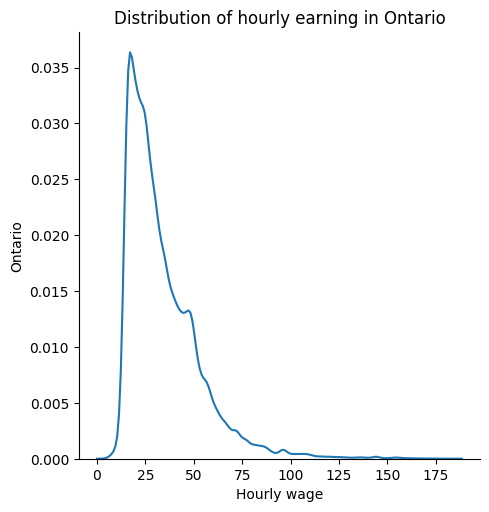

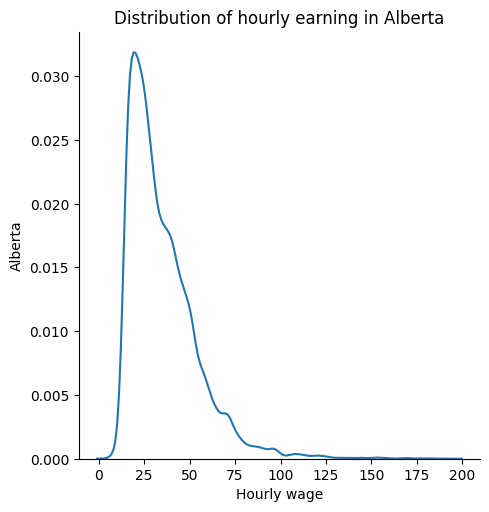

In [6]:
#More observation in two provinces with Ontario and Alberta. Visualize distribution of hourly wage for each province
 #Subplot of Ontario
hrlyearn_ON = df_working[df["prov_name"]=="ON"]
dist_hrlyearn_ON = sns.displot (hrlyearn_ON, x="hrlyearn", kind="kde")
plt.title("Distribution of hourly earning in Ontario")
plt.ylabel("Ontario")
plt.xlabel("Hourly wage")

 #Subplot of Alberta
hrlyearn_AB = df_working[df["prov_name"]=="AB"]
dist_hrlyearn_AB = sns.displot (hrlyearn_AB, x="hrlyearn", kind="kde")
plt.title("Distribution of hourly earning in Alberta")
plt.ylabel("Alberta")
plt.xlabel("Hourly wage")

Both the distribution of hourly earning in Ontario and Alberta are right-skew normal distribution.

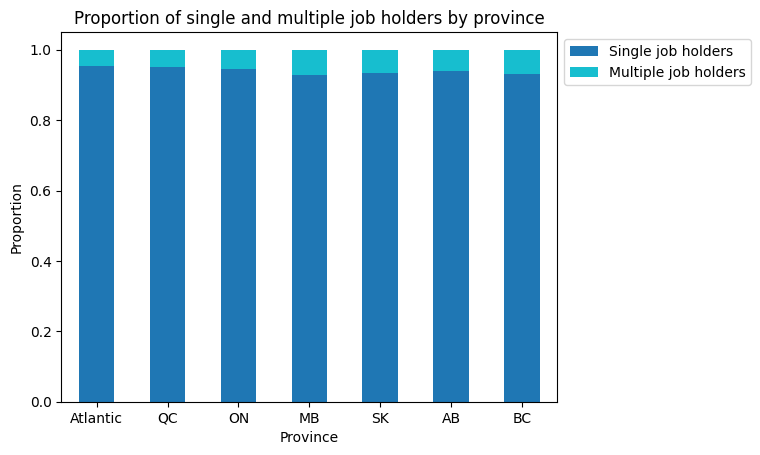

In [7]:
#Do people need to do more multi-jobs to survive in big provinces?
df_mjh = df[["prov_group","mjh"]].dropna()
cross_tab_mjh = pd.crosstab(index=df_mjh["prov_group"], columns=df_mjh["mjh"])
cross_tab_mjh["1_pct"] = cross_tab_mjh["1"]/(cross_tab_mjh["1"]+cross_tab_mjh["2"])
cross_tab_mjh["2_pct"] = cross_tab_mjh["2"]/(cross_tab_mjh["1"]+cross_tab_mjh["2"])

mjh_bar_chart = cross_tab_mjh[["1_pct","2_pct"]].plot(kind="bar", stacked=True, colormap="tab10")
plt.title ("Proportion of single and multiple job holders by province")
plt.xlabel ("Province")
plt.ylabel ("Proportion")
mjh_bar_chart.set_xticklabels (labels.values(), rotation=0)
plt.legend (("Single job holders","Multiple job holders"), loc="best", bbox_to_anchor=(1, 0., 0.1, 1))


There are not much difference among provinces regarding the proportion of single and multiple job holders. More than 90% surveyed residents in each province work for single job only.

[Text(0, 0, '36.7'),
 Text(0, 0, '34.6'),
 Text(0, 0, '35.7'),
 Text(0, 0, '35.9'),
 Text(0, 0, '36.3'),
 Text(0, 0, '37.1'),
 Text(0, 0, '35.0')]

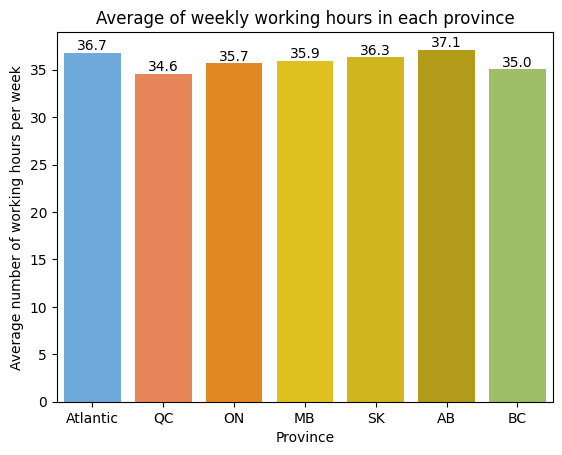

In [86]:
#Usual hours per week at main jobs in each province
df_uhrsmain = df[["uhrsmain","prov_group"]].dropna()
df_uhrsmain["uhrsmain"] = df_uhrsmain["uhrsmain"].astype(float)

df_uhrsmain = df_uhrsmain.groupby("prov_group").aggregate(mean_uhrsmain=("uhrsmain","mean"))
df_uhrsmain = df_uhrsmain.reset_index()

bar_df_uhrsmain = sns.barplot (df_uhrsmain, x="prov_group", y="mean_uhrsmain", palette=["#5CACEE","#FF7D40","#FF8C00","#FFD700","#EEC900","#CDAD00","#A2CD5A"])
bar_df_uhrsmain.set_xticklabels (labels=labels.values())
plt.title ("Average of weekly working hours in each province")
plt.xlabel ("Province")
plt.ylabel("Average number of working hours per week")
bar_df_uhrsmain.bar_label(bar_df_uhrsmain.containers[0], fmt='%.1f', fontsize=10)


Except in Quebec, people in all other provinces work averagely at least 35 hours per week in their main job. The differences of average weekly working hours among provinces are not significant, maximum in just 3 hours per week.